## Шаг 1: Импорт необходимых библиотек 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import plot_tree
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
import pymorphy2
from nltk.tokenize import word_tokenize
from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import emoji
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import spacy
import requests
import json
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pyrogram import Client
from pyrogram.errors import FloodWait
from pyrogram.types import Message
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from celluloid import Camera
sns.set(style="whitegrid")

TgCrypto is missing! Pyrogram will work the same, but at a much slower speed. More info: https://docs.pyrogram.org/topics/speedups


## Шаг 2: Парсинг данных

In [2]:
# Функция-обработчик для извлечения текстовых сообщений
async def extract_messages(app, channel, message_count, group_name):
    data = []
    total_messages = 0

    try:
        # Получаем идентификатор канала
        channel_info = await app.get_chat(channel)
        # Получаем последние сообщения из канала
        
        async for message in app.get_chat_history(channel_info.id, limit=message_count):
            if isinstance(message, Message):
                if message.text:
                    data.append((message.text, group_name))
                    total_messages += 1
                if message.caption:
                    data.append((message.caption, group_name))
                    total_messages += 1
                    
        return data
    
    except FloodWait as e:
        print(f"Подождите {e.x} секунд, прежде чем продолжить.")
        return data

# Создаем клиент Pyrogram
api_id = 
api_hash = ""


channels = [
    {"name": "premni", "group_name": 'avia'},
    {"name": "aviatorshina", "group_name": 'avia'},
    {"name": "s7airlines", "group_name": 'avia'},
    {"name": "favt_ru", "group_name": 'avia'},
    {"name": "avtogram_org", "group_name": 'auto'},
    {"name": "avtog", "group_name": 'auto'},
    {"name": "proautoruu", "group_name": 'auto'},
    {"name": "GGWP_NewsChannel", "group_name": 'auto'},
    {"name": "carimpuls", "group_name": 'auto'},
    {"name": "citydriveru", "group_name": 'auto'},
    {"name": "Auto_News_Top", "group_name": 'auto'},
    {"name": "yndxdrive", "group_name": 'auto'},
    {"name": "chinacarnews", "group_name": 'auto'},
    {"name": "aviation_kitchen", "group_name": 'avia'},
    {"name": "aeroflot", "group_name": 'avia'},
    {"name": "anrbc", "group_name": 'auto'},
    {"name": "avto_rus_news", "group_name": 'auto'},
    {"name": "news_avt", "group_name": 'auto'},
    {"name": "carsnosleep", "group_name": 'auto'}
]
message_count = 6000

async def main():
    async with Client("", api_id, api_hash) as app:
        data = []
        for channel in channels:
            channel_name = channel["name"]
            group_name = channel["group_name"]
            channel_info = await app.get_chat(channel_name)
            data += await extract_messages(app, channel_info.id, message_count, group_name)

        df = pd.DataFrame(data, columns=['text', 'group'])
        return df

df = await main()
print(df)

[] Waiting for 16 seconds before continuing (required by "messages.GetHistory")
[] Waiting for 10 seconds before continuing (required by "messages.GetHistory")
[] Waiting for 16 seconds before continuing (required by "messages.GetHistory")
[] Waiting for 14 seconds before continuing (required by "messages.GetHistory")
[] Waiting for 19 seconds before continuing (required by "messages.GetHistory")
[] Waiting for 5 seconds before continuing (required by "messages.GetHistory")
[] Waiting for 10 seconds before continuing (required by "messages.GetHistory")


                                                    text group
0      Singapore Airlines выплатит значительные суммы...  avia
1      Легкомоторный самолет Cessna вынужденно призем...  avia
2      Продолжаем рубрику #техпричины об инцидентах, ...  avia
3      S7 хочет отсудить больше 1 млрд руб. у "Цифра ...  avia
4      Последствия попадания Airbus A320 под сильный ...  avia
...                                                  ...   ...
24820  Ford запретит дорабатывать двигатели нового Mu...  auto
24821  Выбираем Ford Focus III с пробегом\n\nФорд ушё...  auto
24822  Первой совместной моделью Renault и Geely стан...  auto
24823  Минувшим летом Haval Dargo мы осмотрели почти ...  auto
24824  Иногда бывает так, что штрафы юрлиц «перевешив...  auto

[24825 rows x 2 columns]


## Шаг 3: Первичный анализ данных

In [3]:
df=df.drop_duplicates()#удаление дубликатов
def len_text(example): #удаление постов, где количество элементов текста менее 7
    if len(list(example.split())) < 7:
        return ''
    return example
df['text'] = df['text'].apply(len_text)    
df = df[df['text'] != '']

print(df.shape)

(23020, 2)


In [4]:
df_eda = df.copy()

In [84]:
print('Основная информация о датасете')
print(df_eda.info())
print('-------------------------')
print('Проверка на наличие пропущенных значений')
print('-------------------------')
print(df_eda.isnull().sum())
print('-------------------------')
print('Статистика по столбцу "group"')
print('-------------------------')
print(df_eda['group'].describe())
print('-------------------------')
print('Статистика по уоличеству классов в столбце "group"')
print('-------------------------')
print(df_eda['group'].value_counts())

Основная информация о датасете
<class 'pandas.core.frame.DataFrame'>
Index: 23020 entries, 0 to 24824
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            23020 non-null  object
 1   group           23020 non-null  object
 2   Processed_Text  23020 non-null  object
 3   text_length     23020 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 899.2+ KB
None
-------------------------
Проверка на наличие пропущенных значений
-------------------------
text              0
group             0
Processed_Text    0
text_length       0
dtype: int64
-------------------------
Статистика по столбцу "group"
-------------------------
count     23020
unique        2
top        avia
freq      12426
Name: group, dtype: object
-------------------------
Статистика по уоличеству классов в столбце "group"
-------------------------
group
avia    12426
auto    10594
Name: count, dtype: int64


In [6]:
df_eda.iloc[0]

text     Singapore Airlines выплатит значительные суммы...
group                                                 avia
Name: 0, dtype: object

# Шаг 4: Очистка данных с использованием spaCy и универсальная обработка смайликов

In [7]:
import spacy
import re
import pandas as pd
import emoji

# Загрузка моделей spaCy для русского и английского языков
nlp_ru = spacy.load("ru_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")

def translate_emoji(text):
    # Замена смайликов на их описание
    return emoji.demojize(text, delimiters=(" ", " "))

def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    
    # Перевод смайликов на слова
    text = translate_emoji(text)
    
    # Удаление неалфавитных символов, кроме пробелов и символов подчеркивания
    text = re.sub(r'[^а-яА-Яa-zA-Z\s_]', '', text)
    
    # Лемматизация и удаление стоп-слов для английского текста
    doc_en = nlp_en(text)
    tokens_en = [token.lemma_ for token in doc_en if not token.is_stop and re.match(r'[a-zA-Z]', token.text)]
    
    # Лемматизация и удаление стоп-слов для русского текста
    doc_ru = nlp_ru(text)
    tokens_ru = [token.lemma_ for token in doc_ru if not token.is_stop and re.match(r'[а-яА-Я]', token.text)]
    
    # Объединение токенов
    return ' '.join(tokens_ru + tokens_en)

# Применение функции к столбцу 'text' и создание нового столбца 'Processed_Text'
df_eda['Processed_Text'] = df_eda['text'].apply(preprocess_text)

# Проверка первых строк после обработки
print(df_eda.head())

                                                text group  \
0  Singapore Airlines выплатит значительные суммы...  avia   
1  Легкомоторный самолет Cessna вынужденно призем...  avia   
2  Продолжаем рубрику #техпричины об инцидентах, ...  avia   
3  S7 хочет отсудить больше 1 млрд руб. у "Цифра ...  avia   
4  Последствия попадания Airbus A320 под сильный ...  avia   

                                      Processed_Text  
0  выплатить значительный сумма пассажир пострада...  
1  легкомоторный самолёт вынужденно приземлиться ...  
2  продолжать рубрику техпричины инцидент произой...  
3  хотеть отсудить млрд руб цифра брокер иск пост...  
4  последствие попадание сильный град самолёт лет...  


In [85]:
display(df_eda.head())

,text,group,Processed_Text,text_length
0,Singapore Airlines выплатит значительные суммы...,avia,выплатить значительный сумма пассажир пострада...,117
1,Легкомоторный самолет Cessna вынужденно призем...,avia,легкомоторный самолёт вынужденно приземлиться ...,34
2,"Продолжаем рубрику #техпричины об инцидентах, ...",avia,продолжать рубрику техпричины инцидент произой...,129
3,"S7 хочет отсудить больше 1 млрд руб. у ""Цифра ...",avia,хотеть отсудить млрд руб цифра брокер иск пост...,53
4,Последствия попадания Airbus A320 под сильный ...,avia,последствие попадание сильный град самолёт лет...,49


## Шаг 5: Анализ частоты слов

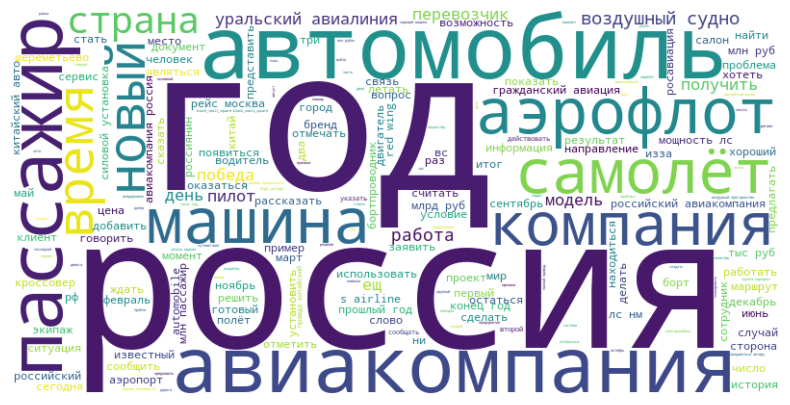

In [8]:
# Объединение всех текстов в один
all_text = ' '.join(df_eda['Processed_Text'])

# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Шаг 6: Частотный анализ слов по группам

In [9]:
# Функция для получения частотности слов в каждой группе
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Применение функции для каждой группы
groups = df_eda['group'].unique()
for group in groups:
    group_text = df_eda[df_eda['group'] == group]['Processed_Text']
    common_words = get_top_n_words(group_text, 10)
    df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    print(f"Top words in group {group}")
    print(df_common_words)

Top words in group avia
           Word  Frequency
0           год      11329
1  авиакомпания      10796
2          рейс       9769
3      аэрофлот       7769
4      аэропорт       7669
5      пассажир       6200
6        россия       6131
7       самолёт       6105
8    российский       4404
9        москва       4207
Top words in group auto
         Word  Frequency
0  автомобиль       7788
1         год       6288
2      машина       5166
3       новый       4634
4      россия       3709
5      модель       3182
6        цена       2868
7   кроссовер       2761
8  automobile       2649
9         руб       2642


# Шаг 7: Визуализация распределения длин текстов

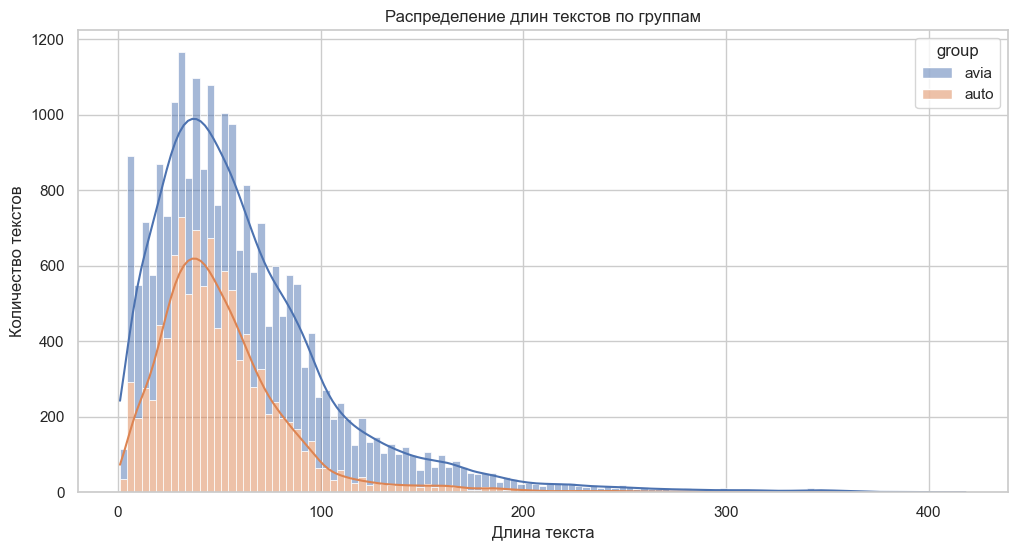

In [10]:
# Добавление столбца с длиной текста
df_eda['text_length'] = df_eda['Processed_Text'].apply(lambda x: len(x.split()))

# Распределение длин текстов по группам
plt.figure(figsize=(12, 6))
sns.histplot(data=df_eda, x='text_length', hue='group', multiple='stack', kde=True)
plt.title('Распределение длин текстов по группам')
plt.xlabel('Длина текста')
plt.ylabel('Количество текстов')
plt.show()

# Шаг 8: Визуализация распределения частот слов по группам

C:\Users\Solomka\AppData\Local\Temp\ipykernel_22896\1446155555.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, ax=axes[i], palette='viridis')
C:\Users\Solomka\AppData\Local\Temp\ipykernel_22896\1446155555.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, ax=axes[i], palette='viridis')


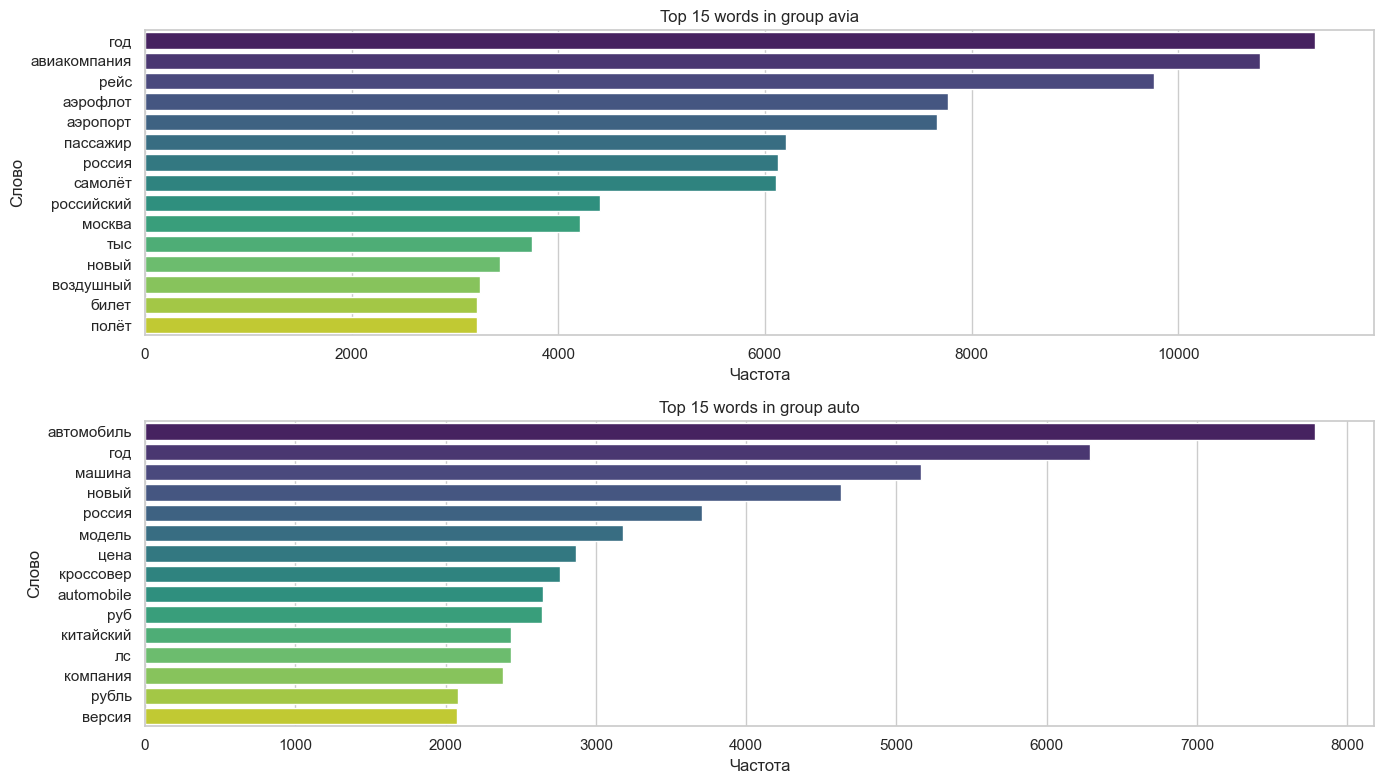

In [11]:
# Визуализация частотности слов в каждой группе
def plot_top_words_per_group(df, group_col, text_col):
    groups = df[group_col].unique()
    fig, axes = plt.subplots(len(groups), 1, figsize=(14, len(groups) * 4))
    
    for i, group in enumerate(groups):
        group_text = df[df[group_col] == group][text_col]
        word_freq = Counter(' '.join(group_text).split())
        most_common_words = word_freq.most_common(15)
        
        words, counts = zip(*most_common_words)
        
        sns.barplot(x=counts, y=words, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Top 15 words in group {group}')
        axes[i].set_xlabel('Частота')
        axes[i].set_ylabel('Слово')
    
    plt.tight_layout()
    plt.show()

plot_top_words_per_group(df_eda, 'group', 'Processed_Text')

## Шаг 9: Сохранение данных

In [12]:
df_eda.to_excel('data_parsing.xlsx')

In [13]:
# Загрузка данных
data = pd.read_excel('data_parsing.xlsx')

In [14]:
data

,Unnamed: 0,text,group,Processed_Text,text_length
0,0,Singapore Airlines выплатит значительные суммы...,avia,выплатить значительный сумма пассажир пострада...,117
1,1,Легкомоторный самолет Cessna вынужденно призем...,avia,легкомоторный самолёт вынужденно приземлиться ...,34
2,2,"Продолжаем рубрику #техпричины об инцидентах, ...",avia,продолжать рубрику техпричины инцидент произой...,129
3,3,"S7 хочет отсудить больше 1 млрд руб. у ""Цифра ...",avia,хотеть отсудить млрд руб цифра брокер иск пост...,53
4,4,Последствия попадания Airbus A320 под сильный ...,avia,последствие попадание сильный град самолёт лет...,49
...,...,...,...,...,...
23015,24820,Ford запретит дорабатывать двигатели нового Mu...,auto,запретить дорабатывать двигатель новый сторонн...,54
23016,24821,Выбираем Ford Focus III с пробегом\n\nФорд ушё...,auto,выбирать пробег форд ушл россия ещ год оставит...,33
23017,24822,Первой совместной моделью Renault и Geely стан...,auto,первый совместный модель стать кросскупе тизер...,34
23018,24823,Минувшим летом Haval Dargo мы осмотрели почти ...,auto,минувший лето осмотреть сторона ключевой слово...,39


In [15]:
data_ml = data[['Processed_Text','group']]
data_ml

,Processed_Text,group
0,выплатить значительный сумма пассажир пострада...,avia
1,легкомоторный самолёт вынужденно приземлиться ...,avia
2,продолжать рубрику техпричины инцидент произой...,avia
3,хотеть отсудить млрд руб цифра брокер иск пост...,avia
4,последствие попадание сильный град самолёт лет...,avia
...,...,...
23015,запретить дорабатывать двигатель новый сторонн...,auto
23016,выбирать пробег форд ушл россия ещ год оставит...,auto
23017,первый совместный модель стать кросскупе тизер...,auto
23018,минувший лето осмотреть сторона ключевой слово...,auto


## Шаг 10: Разделение выборки на test и train

In [16]:
import pandas as pd
import numpy as np
import spacy
import re
import emoji
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
# Разделение датасета
X_train, X_test, y_train, y_test = train_test_split(data_ml['Processed_Text'], data_ml['group'], test_size=0.2, random_state=42)

In [86]:
# Преобразование меток
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.tolist())
y_test_encoded = label_encoder.transform(y_test.tolist())

In [87]:
# Токенизация и преобразование в последовательности
tokenizer = Tokenizer(num_words=25000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train.tolist())
X_train_seq = tokenizer.texts_to_sequences(X_train.tolist())
X_test_seq = tokenizer.texts_to_sequences(X_test.tolist())
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [18]:
print(max_len,' максимальная длина текста')

422  максимальная длина текста


## Сохранение трейновой и тестовой выборок  

In [19]:
if not os.path.exists('train'):
    os.makedirs('train')
if not os.path.exists('test'):
    os.makedirs('test')

train_data = pd.DataFrame({'Processed_Text': X_train, 'group': y_train})
test_data = pd.DataFrame({'Processed_Text': X_test, 'group': y_test})

train_data.to_csv('train/train_data.csv', index=False)
test_data.to_csv('test/test_data.csv', index=False)

## Шаг 11: Обучение модели CatBoostClassifier

In [22]:
from catboost import CatBoostClassifier
mode_cat = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    early_stopping_rounds=50,
    random_seed=42
)

# Обучение модели
mode_cat.fit(
    X_train_pad, y_train_encoded,
    eval_set=(X_test_pad, y_test_encoded),
    verbose=100
)
# Предсказание на валидационных данных
val_predictions = mode_cat.predict(X_test_pad)

# Оценка точности
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Validation Accuracy: {accuracy}')

0:	learn: 0.6492181	test: 0.6277150	best: 0.6277150 (0)	total: 223ms	remaining: 3m 42s
100:	learn: 0.7808427	test: 0.7643354	best: 0.7652042 (99)	total: 6.6s	remaining: 58.7s
200:	learn: 0.8486642	test: 0.8145091	best: 0.8151607 (198)	total: 12.8s	remaining: 50.9s
300:	learn: 0.8786381	test: 0.8316681	best: 0.8316681 (297)	total: 19.2s	remaining: 44.5s
400:	learn: 0.9004670	test: 0.8427454	best: 0.8427454 (399)	total: 25.1s	remaining: 37.5s
500:	learn: 0.9162142	test: 0.8442659	best: 0.8460035 (478)	total: 31.3s	remaining: 31.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8460034752
bestIteration = 478

Shrink model to first 479 iterations.
Validation Accuracy: 0.7443527367506516


##  Визуализация поверхности вероятностей предсказаний модели

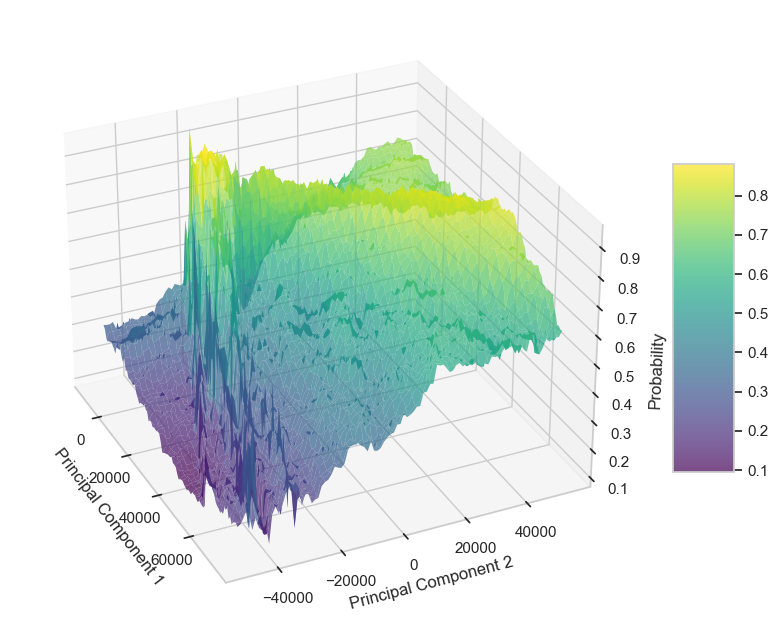

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Уменьшение размерности для визуализации
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_pad)

# Определение сетки для поверхности
x = np.linspace(X_reduced[:, 0].min(), X_reduced[:, 0].max(), 100)
y = np.linspace(X_reduced[:, 1].min(), X_reduced[:, 1].max(), 100)
x, y = np.meshgrid(x, y)

# Функция предсказания для сетки
def predict_mesh(x, y, model, pca):
    mesh_points = np.c_[x.ravel(), y.ravel()]
    mesh_points_embeddings = pca.inverse_transform(mesh_points)
    return model.predict_proba(mesh_points_embeddings)[:, 1].reshape(x.shape)

# Построение поверхности
z = predict_mesh(x, y, mode_cat, pca)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.7)

# Настройка цветовой полосы
fig.colorbar(surface, shrink=0.5, aspect=5)

# Метки осей
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Probability')

# Настройка углов обзора
ax.view_init(elev=30, azim=-25)

plt.show()

## Сохраниение моделей

In [24]:
if not os.path.exists('model'):
    os.makedirs('model')
# Сохранение моделей
joblib.dump(tokenizer, 'model/tokenizer.pkl')
joblib.dump(model, 'model/gradient_boosting_model.pkl')
joblib.dump(mode_cat, 'model/cat_boosting_model.pkl')

['model/cat_boosting_model.pkl']

## Шаг 12: Обучение нейронной сети

In [32]:
model_NLP = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128),
    LSTM(32, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),
    LSTM(16, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
# Компиляция модели
model_NLP.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Обучение модели с использованием Early Stopping данными
history = model_NLP.fit(X_train_pad, y_train_encoded, epochs=16, batch_size=32, validation_data=(X_test_pad, y_test_encoded), callbacks=[early_stopping])

Epoch 1/16
576/576 ━━━━━━━━━━━━━━━━━━━━ 153s 257ms/step - accuracy: 0.5213 - loss: 1.1327 - val_accuracy: 0.8458 - val_loss: 0.6727
Epoch 2/16
576/576 ━━━━━━━━━━━━━━━━━━━━ 145s 251ms/step - accuracy: 0.9178 - loss: 0.3762 - val_accuracy: 0.9828 - val_loss: 0.1622
Epoch 3/16
576/576 ━━━━━━━━━━━━━━━━━━━━ 139s 241ms/step - accuracy: 0.9860 - loss: 0.1624 - val_accuracy: 0.9835 - val_loss: 0.1458
Epoch 4/16
576/576 ━━━━━━━━━━━━━━━━━━━━ 139s 242ms/step - accuracy: 0.9903 - loss: 0.1246 - val_accuracy: 0.9794 - val_loss: 0.1671
Epoch 5/16
576/576 ━━━━━━━━━━━━━━━━━━━━ 155s 268ms/step - accuracy: 0.9945 - loss: 0.0929 - val_accuracy: 0.9820 - val_loss: 0.1325
Epoch 6/16
576/576 ━━━━━━━━━━━━━━━━━━━━ 146s 254ms/step - accuracy: 0.9956 - loss: 0.0714 - val_accuracy: 0.9798 - val_loss: 0.1496
Epoch 7/16
576/576 ━━━━━━━━━━━━━━━━━━━━ 139s 241ms/step - accuracy: 0.9945 - loss: 0.0595 - val_accuracy: 0.9820 - val_loss: 0.1113
Epoch 8/16
576/576 ━━━━━━━━━━━━━━━━━━━━ 140s 242ms/step - accuracy: 0.9959 -

## Сохранение модели

In [33]:
joblib.dump(model_NLP, 'model/model_NLP.pkl')

['model/model_NLP.pkl']

## Шаг 13 Интерпретация результатов обучения нейросети

In [34]:
# Оценка модели на тестовом наборе данных
y_pred_probs = model_NLP.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Вычисление метрик
roc_auc = roc_auc_score(y_test_encoded, y_pred_probs[:, 1])  # Передаем вероятности для положительного класса
f1 = f1_score(y_test_encoded, y_pred)ф
recall = recall_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)

# Вывод значений метрик
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)

144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step
ROC AUC Score: 0.9985679250582309
F1 Score: 0.9868
Recall Score: 0.9856172592888534
Precision Score: 0.9879855826992391


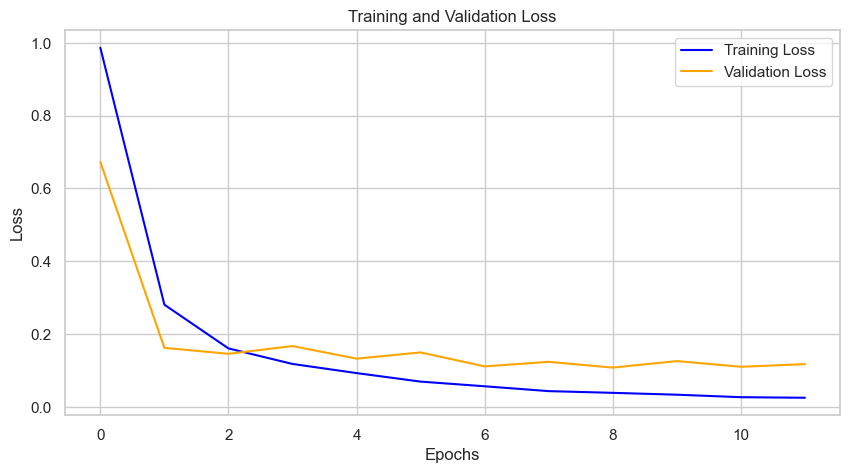

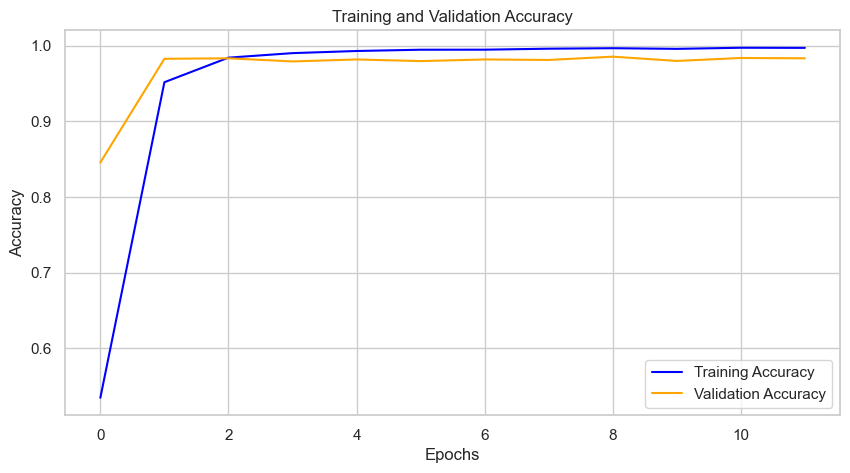

In [57]:
def plot_training_history(history):
    # Получаем значения функции потерь и точности на обучающем и валидационном наборах
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Строим график функции потерь
    plt.figure(figsize=(10, 5))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Строим график точности
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy, label='Training Accuracy', color='blue')
    plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Пример использования
plot_training_history(history)

144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step


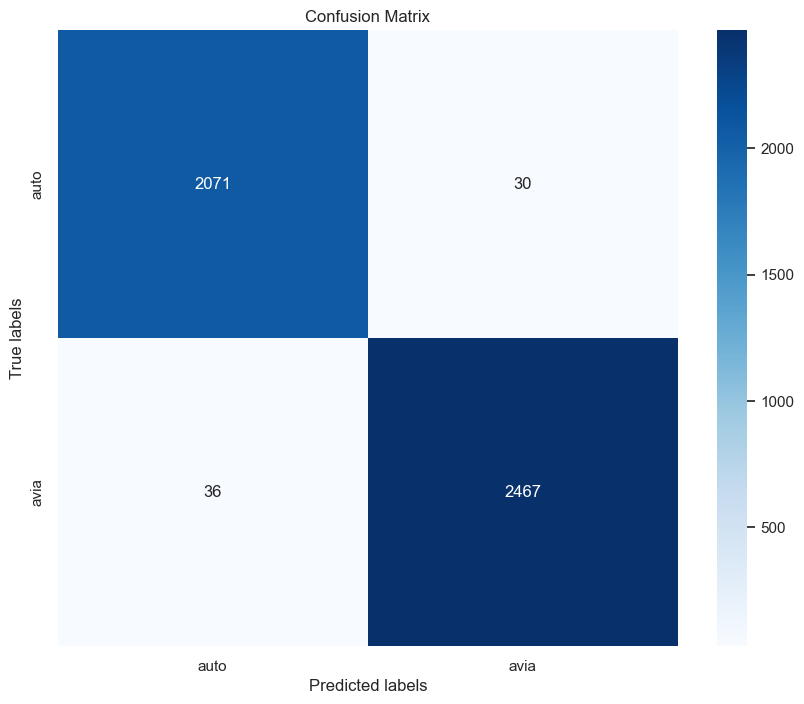

In [36]:

y_pred = model_NLP.predict(X_test_pad)

y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Шаг 14: Предсказание класса на новых данных

In [89]:

def preprocess_new_text(text):
    processed_text = preprocess_text(text) 
    sequence = tokenizer.texts_to_sequences([processed_text]) 
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')  
    return padded_sequence
    
new_post_text =  '''Mercedes-Benz депутата Госдумы Алексея Езубова врезался во внедорожник экс-топ-менеджера Huawei в Подмосковной деревне Обушково под Истрой. Момент аварии и последствия на видео.

Предварительно, 76-летний депутат (на фото) на чёрном седане вылетел на встречку и врезался в Land Rover Discovery. За рулём которого сидел 62-летний Евгений Лисицын. Ранее он был директором департамента по работе с ключевыми клиентами Huawei в России.

У Езубова закрытая черепно-мозговая, сотрясение, множественные ссадины. У Лисицына ушиб мягких тканей головы, сотряс, закрытая черепно-мозговая и ушиб предплечья. Обоих госпитализировали.'''

preprocessed_new_post = preprocess_new_text(new_post_text)

predicted_class_probs = model_NLP.predict(preprocessed_new_post)
predicted_class_index = np.argmax(predicted_class_probs)

predicted_class = label_encoder.classes_[predicted_class_index]

print("Новый пост отнесен к категории номер:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Новый пост отнесен к категории номер: auto
